In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import io
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df=pd.read_csv("bundang3years_small1.csv")
print(df.head())
print(df.shape)

             시군구      단지명  전용면적   거래금액  층  건축년도  최고층  총세대수  용적률  건폐율  지하철도보거리  \
0  경기도 성남분당구 구미동  LG트윈하우스    42  15300  3  1999    8   342  422   74     0.46   
1  경기도 성남분당구 구미동  LG트윈하우스    42  15200  4  1999    8   342  422   74     0.46   
2  경기도 성남분당구 구미동  LG트윈하우스    42  15500  6  1999    8   342  422   74     0.46   
3  경기도 성남분당구 구미동  LG트윈하우스    42  15400  3  1999    8   342  422   74     0.46   
4  경기도 성남분당구 구미동  LG트윈하우스    42  15100  2  1999    8   342  422   74     0.46   

   대형병원최소거리  마트최소거리  경과년수   월  
0       2.2     0.4    21  13  
1       2.2     0.4    21  14  
2       2.2     0.4    21  15  
3       2.2     0.4    21  17  
4       2.2     0.4    22  25  
(2840, 15)


In [3]:
#데이터 확인 및 필요 없는 열 삭제
#df=pd.read_csv(io.BytesIO(uploaded['bundang1.csv']),encoding='euc-kr')
#df=pd.read_csv("bundang1.csv")
pd.set_option('display.max_columns', 500)

df.drop(['시군구'],axis=1,inplace=True)
df.drop(['단지명'],axis=1,inplace=True)
df.drop(['건축년도'],axis=1,inplace=True)
# df.drop(['마트최소거리'],axis=1,inplace=True)
# df.drop(['지하철도보거리'],axis=1,inplace=True)
# df.drop(['용적률'],axis=1,inplace=True)
# df.drop(['대형병원최소거리'],axis=1,inplace=True)
#df.drop(['층'],axis=1,inplace=True)
# df.drop(['건폐율'],axis=1,inplace=True)
#df.drop(['총세대수'],axis=1,inplace=True)
# df.drop(['규모별월세가격지수'],axis=1,inplace=True)
# df.drop(['규모별수익률'],axis=1,inplace=True)
# df.drop(['동별인구수'],axis=1,inplace=True)
print(df.head())

#데이터 형태 실수로 변환
#면적 거래금액 분리버전
Y = df['거래금액'].values
Y = Y.astype('float')
X = df.drop(labels=['거래금액'],axis=1)
X = X.astype('float')

# 단위면적당 거래금액 버전
# df.drop(['전용면적'],axis=1,inplace=True)
# df.drop(['거래금액'],axis=1,inplace=True)
# Y = df['거래금액2'].values
# Y = Y.astype('float')
# X = df.drop(labels=['거래금액2'],axis=1)
# X = X.astype('float')

# 훈련셋, 시험셋 분류 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

   전용면적   거래금액  층  최고층  총세대수  용적률  건폐율  지하철도보거리  대형병원최소거리  마트최소거리  경과년수   월
0    42  15300  3    8   342  422   74     0.46       2.2     0.4    21  13
1    42  15200  4    8   342  422   74     0.46       2.2     0.4    21  14
2    42  15500  6    8   342  422   74     0.46       2.2     0.4    21  15
3    42  15400  3    8   342  422   74     0.46       2.2     0.4    21  17
4    42  15100  2    8   342  422   74     0.46       2.2     0.4    22  25


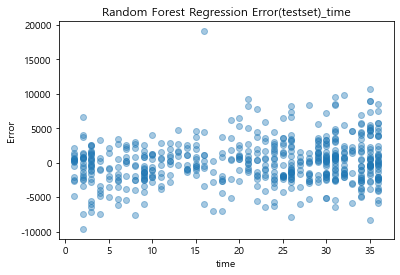

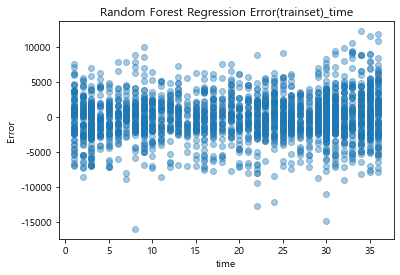

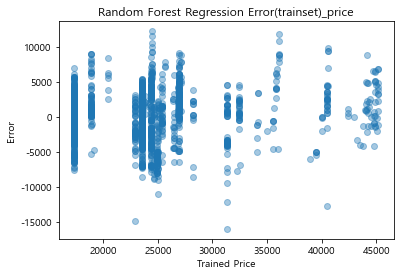

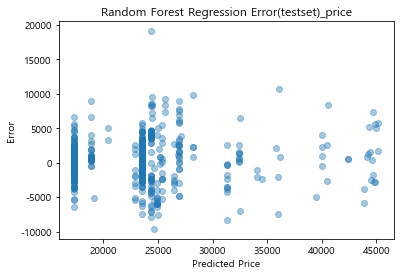

In [4]:
#랜덤포레스트회귀모델 생성 및 예측값 실제값 비교
#n_estimators = 나무의 개수 ,random_state=난수
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=750, max_depth=3)
RF_model.fit(X_train, Y_train)

#예측값 생성
RF_prediction_test = RF_model.predict(X_test)
RF_prediction_test = RF_prediction_test.astype('float')
RF_train_test = RF_model.predict(X_train)
RF_train_test = RF_train_test.astype('float')
#시간에따른 error
time = X_test['월'].values
time_train = X_train['월'].values
#time = time.astype('float')

error=Y_test-RF_prediction_test
plt.scatter(time, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('Random Forest Regression Error(testset)_time')
plt.show()

error=Y_train-RF_train_test
plt.scatter(time_train, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('Random Forest Regression Error(trainset)_time')
plt.show()

#훈련셋 잔차그래프
error_price=Y_train-RF_train_test
plt.scatter(RF_train_test, error_price, alpha=0.4)
plt.xlabel('Trained Price')
plt.ylabel('Error')
plt.title('Random Forest Regression Error(trainset)_price')
plt.show()

#잔차그래프 (등분산,우상향,이차함수꼴 나오면 안됨)
error_price=Y_test-RF_prediction_test
plt.scatter(RF_prediction_test, error_price, alpha=0.4)
plt.xlabel('Predicted Price')
plt.ylabel('Error')
plt.title('Random Forest Regression Error(testset)_price')
plt.show()

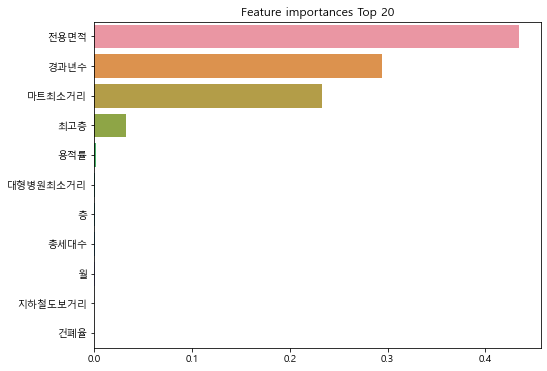

전용면적  층  최고층  총세대수  용적률  건폐율  지하철도보거리  대형병원최소거리  마트최소거리  경과년수   월
[4.34738250e-01 9.54632404e-04 3.20515516e-02 7.16773693e-04
 1.80016406e-03 5.09642839e-05 2.31801221e-04 1.20027064e-03
 2.33128685e-01 2.94655923e-01 4.70983507e-04]


In [5]:
#-----------------------------------------------------독립변수 중요도
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"]='Malgun Gothic'

importances_values = RF_model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()
print("전용면적  층  최고층  총세대수  용적률  건폐율  지하철도보거리  대형병원최소거리  마트최소거리  경과년수   월")
print(importances_values)

[21:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


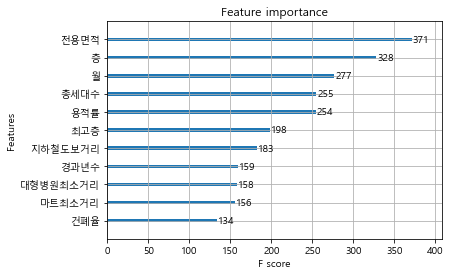

In [8]:
from xgboost import XGBRegressor # 회귀트리 모델
from xgboost import plot_importance # 중요변수 시각화
import matplotlib.pyplot as plt

xg_reg =XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.1, max_depth = 5, n_estimators = 100)
xg_reg.fit(X_train,Y_train)

import matplotlib.pyplot as plt
plot_importance(xg_reg)
#plt.yticks(range(13), col_names)
plt.show()

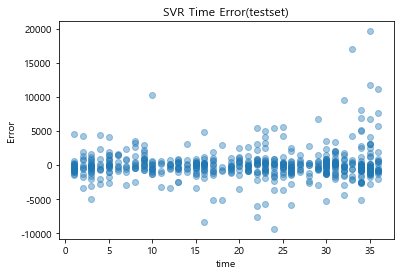

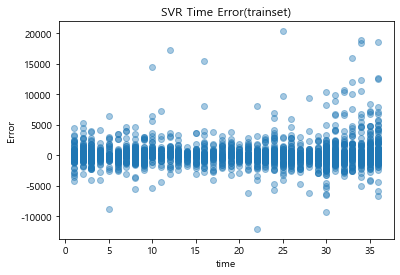

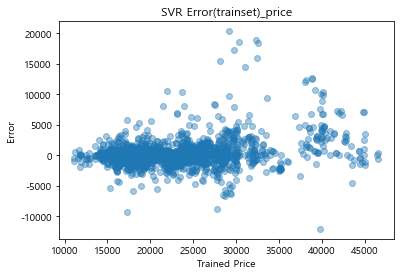

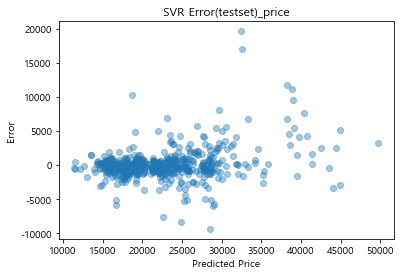

In [6]:
from sklearn import svm

SVR_model = svm.SVR(kernel='rbf',gamma=0.00015,C=10000)
SVR_model.fit(X_train, Y_train)
            
#예측값 생성
SVR_prediction_test = SVR_model.predict(X_test)
SVR_prediction_test = SVR_prediction_test.astype('float')
            
#만든 모델에 train set 다시 넣어 trainset rmse 구하기 위해 만든것
SVR_train_test = SVR_model.predict(X_train)
SVR_train_test = SVR_train_test.astype('float')

#시간에따른 error
time = X_test['월'].values
time_train = X_train['월'].values
#time = time.astype('float')

error=Y_test-SVR_prediction_test
plt.scatter(time, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('SVR Time Error(testset)')
plt.show()

error=Y_train-SVR_train_test
plt.scatter(time_train, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('SVR Time Error(trainset)')
plt.show()

#훈련셋 잔차그래프
error_price=Y_train-SVR_train_test
plt.scatter(SVR_train_test, error_price, alpha=0.4)
plt.xlabel('Trained Price')
plt.ylabel('Error')
plt.title('SVR Error(trainset)_price')
plt.show()

#잔차그래프 (등분산,우상향,이차함수꼴 나오면 안됨)
error_price=Y_test-SVR_prediction_test
plt.scatter(SVR_prediction_test, error_price, alpha=0.4)
plt.xlabel('Predicted Price')
plt.ylabel('Error')
plt.title('SVR Error(testset)_price')
plt.show()

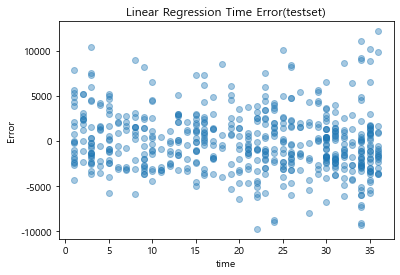

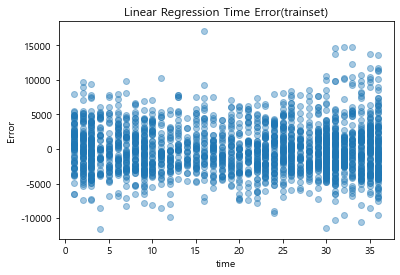

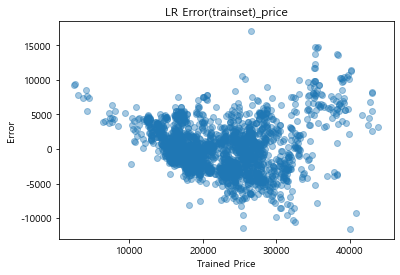

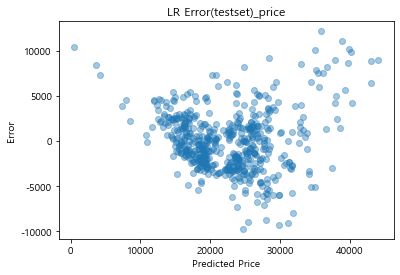

In [7]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(X_train, Y_train)
LR_prediction_test = LR_model.predict(X_test)
LR_prediction_test = LR_prediction_test.astype('float')
LR_train_test = LR_model.predict(X_train)
LR_train_test = LR_train_test.astype('float')

#시간에따른 error
time = X_test['월'].values
time_train = X_train['월'].values
#time = time.astype('float')

error=Y_test-LR_prediction_test
plt.scatter(time, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('Linear Regression Time Error(testset)')
plt.show()

error=Y_train-LR_train_test
plt.scatter(time_train, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('Linear Regression Time Error(trainset)')
plt.show()

#훈련셋 잔차그래프
error_price=Y_train-LR_train_test
plt.scatter(LR_train_test, error_price, alpha=0.4)
plt.xlabel('Trained Price')
plt.ylabel('Error')
plt.title('LR Error(trainset)_price')
plt.show()

#잔차그래프 (등분산,우상향,이차함수꼴 나오면 안됨)
error_price=Y_test-LR_prediction_test
plt.scatter(LR_prediction_test, error_price, alpha=0.4)
plt.xlabel('Predicted Price')
plt.ylabel('Error')
plt.title('LR Error(testset)_price')
plt.show()